In [1]:
def allInOne(path, i, rPathsArr, rOneArr, rMultArr, avgHopsPathsArr, avgHopsOneArr, avgHopsMultArr, avgHopsSPArr, printRes=True):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    
    df = pd.read_csv(path)
    if printRes:
        display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()
    spLength = df['spLength'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    spLengthPositive = spLength > -1
    
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    avgHopsPath = np.mean(hopsPath[hopsPathPositive])
    
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)
    avgHopsMult = np.mean(hopsRankedFiltered)
    avgHopsMultFull = np.mean(hopsRanked[hopsRankedPositive])
    
    if printRes:
        print("avg where both found D:", avgHopsMult)
        print("avg full:", avgHopsMultFull)
    
    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   
    avgHopsOne = np.mean(hopsRankedOneFiltered)
    
    avgSpLength = np.mean(spLength[spLengthPositive])

    percentPaths = (successesPath / total) * 100
    percentOne = (successesRankedOne / total) * 100
    percentRanked = (successesRanked / total) * 100
    
    if printRes:
        print("Resilience Paths: {}%".format(percentPaths))
        print("Resilience One Tree: {}%".format(percentOne))
        print("Resilience Trees: {}%".format(percentRanked))
        #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    


    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)
    
    if printRes:
        print("Trees beat paths in {} runs".format(higherZero))
        print("Paths beat trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)
    
    if printRes:
        print("One Tree beat paths in {} runs".format(higherZero))
        print("Paths beat one tree in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    
    if printRes:
        plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    if printRes:
        print("Multiple Trees beat One Tree in {} runs".format(higherZero))
        print("One Tree beat  multiple trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    if printRes:
        print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
        print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))
    
    rPathsArr[i] = percentPaths
    rOneArr[i] = percentOne
    rMultArr[i] = percentRanked
    avgHopsPathsArr[i] = avgHopsPath
    avgHopsOneArr[i] = avgHopsOne
    avgHopsMultArr[i] = avgHopsMult
    avgHopsSPArr[i] = avgSpLength
    
    return 

In [2]:
def plotEval(xVals, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    
    plt.plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
    plt.plot(xVals, rOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.title('Resilience - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Resilience')
 
    plt.legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    plt.show()
    
    
    
    plt.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=6, color='violet', linewidth=4)
    #plt.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
    #plt.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.title('Avg. Hops - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Average Hops')
    
    plt.legend(handles=[both_patch, multtrees_patch])
    plt.show()
    
    

    percentAvgsOneToPaths = []
    percentAvgsMultToPaths = []

    def getIncrease(val1, val2):
        return (abs(val2 - val1) / val1) * 100.0

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToPaths.append(getIncrease(avgHopsPaths[i], avgHopsOne[i]))
        percentAvgsMultToPaths.append(getIncrease(avgHopsPaths[i], avgHopsMult[i]))
        
        
    plt.plot(xVals, percentAvgsOneToPaths, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, percentAvgsMultToPaths, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)

    plt.title('Percent Increase in Hops - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Percent difference to BLUE')
    plt.show()
    
    
    percentAvgsOneToSP = []
    percentAvgsMultToSP = []
    percentAvgsPathsToSP = []

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToSP.append(getIncrease(avgHopsSP[i], avgHopsOne[i]))

        percentAvgsMultToSP.append(getIncrease(avgHopsSP[i], avgHopsMult[i]))
        percentAvgsPathsToSP.append(getIncrease(avgHopsSP[i], avgHopsPaths[i]))
        
        
    plt.plot(xVals, percentAvgsOneToSP, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, percentAvgsMultToSP, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.plot(xVals, percentAvgsPathsToSP, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)

    plt.title('Percent Increase to SP - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Percent difference to Shortest Path')
    plt.show()   

In [3]:
def plotEvalAx(ax, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    linewidth = 2 
    ax1, ax2, index = ax
    
    xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    
    ax1[index].plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    ax1[index].plot(xVals, rOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax1[index].plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=linewidth)
    #ax.title('Resilience - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Resilience')
 
    if index == 0:
        ax1[index].legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    #ax.show()
    
    
    
    ax2[index].plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=6, color='violet', linewidth=linewidth)
    #ax.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    #ax.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax2[index].plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=linewidth)
    #ax.title('Avg. Hops - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Average Hops')
    
    if index == 0:
        ax2[index].legend(handles=[both_patch, multtrees_patch])
    #ax.show()
    
    


In [4]:
def plotEvalAx2(xVals, ax, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, markersize=3, alpha=1):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    linewidth = 2 
    ax1, ax2, index = ax
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    ax1[index].plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=markersize, color='skyblue', linewidth=linewidth, alpha=alpha)
    ax1[index].plot(xVals, rOne, marker='x', markerfacecolor='red', markersize=markersize, color='darkred', linewidth=linewidth, alpha=alpha)
    ax1[index].plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=markersize, color='lightgreen', linewidth=linewidth, alpha=alpha)
    #ax.title('Resilience - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Resilience')
 
    if index == 0:
        ax1[index].legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    #ax.show()
    
    
    
    ax2[index].plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=markersize, color='violet', linewidth=linewidth, alpha=1)
    #ax.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    #ax.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax2[index].plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=markersize, color='lightgreen', linewidth=linewidth, alpha=1)
    #ax.title('Avg. Hops - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Average Hops')
    
    if index == 0:
        ax2[index].legend(handles=[both_patch, multtrees_patch])
    #ax.show()
    

In [5]:
#path_base = 'CSVs/n25-clustered/'
path_base = 'CSVs/n25-random/'

In [9]:
import numpy as np
def printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult):
    increaseArrMult = np.array(avgHopsMult) / np.array(avgHopsPaths)
    increaseArrOne = np.array(avgHopsOne) / np.array(avgHopsPaths)
    print("percent increase mult to edp:", increaseArrMult)
    print("percent increase one to edp:", increaseArrOne)

    print("avg increase mult to edp:", np.mean(increaseArrMult))
    print("avg increase one to edp:", np.mean(increaseArrOne))

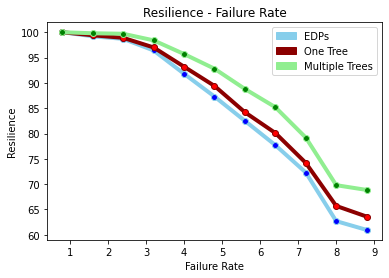

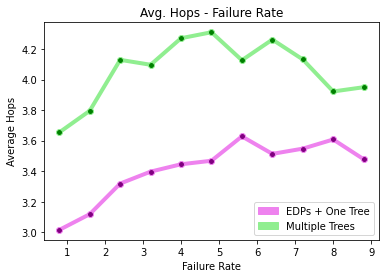

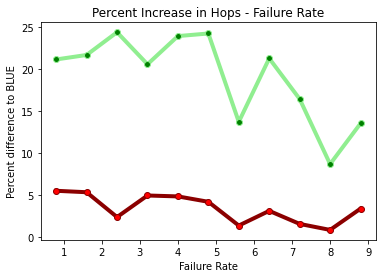

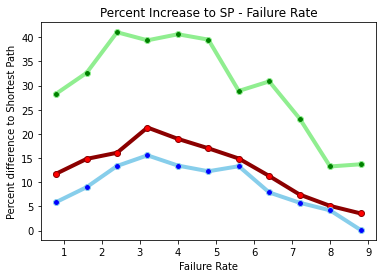

percent increase mult to edp: [1.21153846 1.21687136 1.24389499 1.20580153 1.23932975 1.24240423
 1.13732041 1.21282051 1.16452242 1.08709107 1.13547053]
percent increase one to edp: [1.05537135 1.05365223 1.02411477 1.04977099 1.04868795 1.04227213
 1.01403274 1.03150183 1.01598441 1.00884173 1.03412616]
avg increase mult to edp: 1.190642296823598
avg increase one to edp: 1.0343960279161644


In [10]:
path_base = 'CSVs/n25-random/'

xVals = []
x = 0.8
while(x <= 8.8):
    xVals.append(x)
    x += 0.8
    x = round(x, 1)

files = ['trees-p0.15-n25-ff'+str(val)+'.csv' for val in xVals]


nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)


plotEval(xVals, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

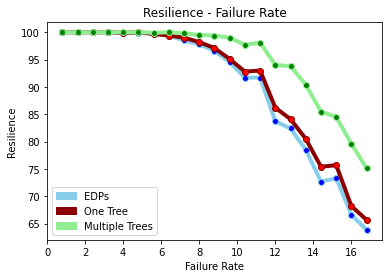

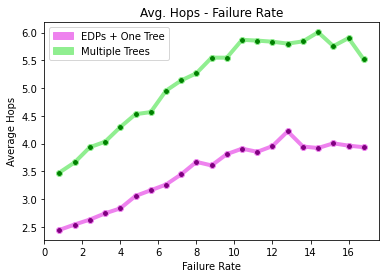

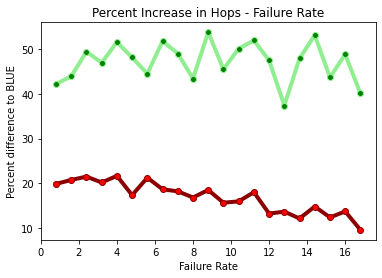

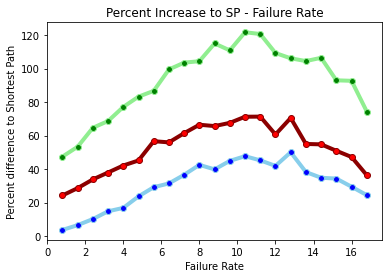

percent increase mult to edp: [1.42214957 1.43946541 1.49487277 1.46958106 1.51608342 1.48150573
 1.44525547 1.51803885 1.4904271  1.43441938 1.53802009 1.45530261
 1.50125523 1.51967167 1.47508306 1.37395803 1.47950952 1.53139249
 1.4369891  1.48863636 1.40123111]
percent increase one to edp: [1.19861054 1.20754717 1.21496392 1.20182149 1.21668434 1.17348609
 1.21263091 1.18655566 1.1820324  1.16819827 1.18507891 1.15657968
 1.1595537  1.18001698 1.13228632 1.13653349 1.12132946 1.14801824
 1.1236376  1.13712121 1.0956911 ]
avg increase mult to edp: 1.4720403827259259
avg increase one to edp: 1.1684941660502803


In [12]:
path_base = 'CSVs/n50-random/'

xVals = []
x = 0.8
while(x <= 16.8):
    xVals.append(x)
    x += 0.8
    x = round(x, 1)

files = ['trees-p0.15-n50-ff'+str(val)+'.csv' for val in xVals]


nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)


plotEval(xVals, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

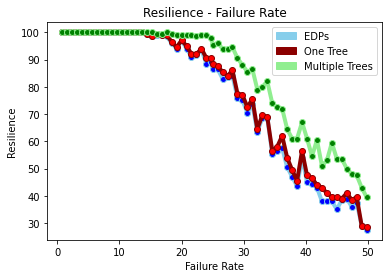

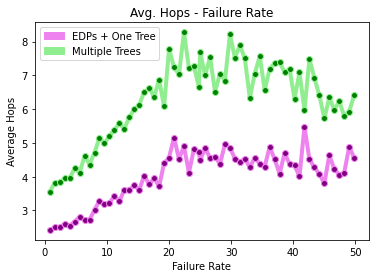

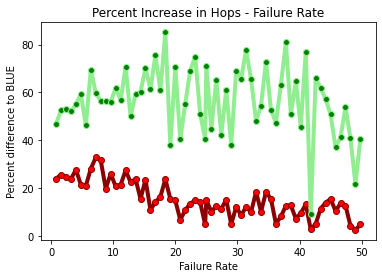

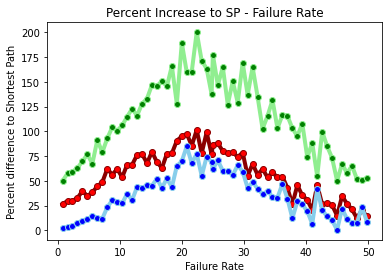

[2.425, 2.505, 2.5, 2.605, 2.55, 2.67, 2.815, 2.725, 2.73, 3.015, 3.295, 3.195, 3.22, 3.44, 3.27, 3.61, 3.62, 3.7437185929648242, 3.6091370558375635, 4.0353535353535355, 3.772727272727273, 3.954314720812183, 3.7135416666666665, 4.404255319148936, 4.56701030927835, 5.159574468085107, 4.527472527472527, 4.896174863387978, 4.122994652406417, 4.813559322033898, 4.741573033707865, 4.497109826589595, 4.84393063583815, 4.566265060240964, 4.580838323353293, 4.380952380952381, 4.9605263157894735, 4.86, 4.539007092198582, 4.442176870748299, 4.535433070866142, 4.2773722627737225, 4.569343065693431, 4.378378378378378, 4.300884955752212, 4.886956521739131, 4.514851485148514, 4.085106382978723, 4.7011494252873565, 4.37037037037037, 4.333333333333333, 4.01123595505618, 5.476744186046512, 4.5131578947368425, 4.276315789473684, 4.078947368421052, 3.8, 4.636363636363637, 4.230769230769231, 4.055555555555555, 4.12, 4.879310344827586, 4.5636363636363635]
[3.56, 3.82, 3.83, 3.96, 3.955, 4.25, 4.115, 4.62, 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_base = 'CSVs/n100-random/'

xVals = []
x = 0.8
while(x <= 50.0):
    xVals.append(x)
    if x == 24.8:
        x+=0.2
    else:
        x += 0.8
    x = round(x, 1)

files = ['trees-p0.1-n100-ff'+str(val)+'.csv' for val in xVals]


nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)


plotEval(xVals, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

print(avgHopsPaths)
print(avgHopsMult)

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)


In [15]:
path_base = 'CSVs/n50-random/'
files = ['trees-p0.15-n50-f0.3.csv', 
         'trees-p0.15-n50-f0.4.csv', 
         'trees-p0.15-n50-f0.5.csv',
         'trees-p0.15-n50-f0.6.csv',
         'trees-p0.15-n50-f0.7.csv',
         'trees-p0.15-n50-f0.8.csv',
         'trees-p0.15-n50-f0.9.csv'
        ]

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)


FileNotFoundError: [Errno 2] No such file or directory: 'CSVs/n50-random/trees-p0.15-n50-f0.3.csv'

In [16]:
path_base = 'CSVs/n100-random/'
pStr = "0.02"
nStr = "100"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

FileNotFoundError: [Errno 2] No such file or directory: 'CSVs/n100-random/trees-p0.02-n100-f0.3.csv'

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,55,0.15,4,NaN,clustered,0.3;-0.3,3,2,2,1,8,2,0,2,2,0,4,edgeCount
1,999,25,44,0.15,3,NaN,clustered,0.3;-0.3,6,7,3,3,0,3,0,3,3,0,0,edgeCount
2,998,25,41,0.15,2,NaN,clustered,0.3;-0.3,5,3,3,2,4,3,0,3,3,0,4,edgeCount
3,997,25,49,0.15,4,NaN,clustered,0.3;-0.3,4,3,3,1,4,3,0,3,3,0,2,edgeCount
4,996,25,37,0.15,3,NaN,clustered,0.3;-0.3,7,3,3,4,0,3,0,3,3,0,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,47,0.15,3,NaN,clustered,0.4;-0.3,2,2,2,0,0,2,0,2,2,0,0,edgeCount
1,999,25,46,0.15,3,NaN,clustered,0.4;-0.3,3,3,3,0,2,3,0,3,5,0,2,edgeCount
2,998,25,52,0.15,6,NaN,clustered,0.4;-0.3,3,2,2,1,0,2,0,3,2,1,0,edgeCount
3,997,25,46,0.15,1,NaN,clustered,0.4;-0.3,4,4,4,0,0,4,0,4,4,0,0,edgeCount
4,996,25,54,0.15,4,NaN,clustered,0.4;-0.3,9,7,3,6,8,7,4,9,9,6,4,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,46,0.15,3,NaN,clustered,0.5;-0.3,5,5,3,2,0,3,0,3,3,0,0,edgeCount
1,999,25,40,0.15,4,NaN,clustered,0.5;-0.3,16,2,2,14,4,2,0,6,2,4,2,edgeCount
2,998,25,52,0.15,3,NaN,clustered,0.5;-0.3,4,7,4,0,2,10,6,4,12,0,2,edgeCount
3,997,25,53,0.15,4,NaN,clustered,0.5;-0.3,11,10,4,7,0,17,13,17,17,13,0,edgeCount
4,996,25,37,0.15,3,NaN,clustered,0.5;-0.3,28,6,6,22,2,-1,-7,21,21,15,2,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,41,0.15,2,NaN,clustered,0.6;-0.3,4,11,4,0,0,10,6,10,10,6,0,edgeCount
1,999,25,40,0.15,2,NaN,clustered,0.6;-0.3,6,4,4,2,2,-1,-5,-1,-1,-5,2,edgeCount
2,998,25,46,0.15,2,NaN,clustered,0.6;-0.3,2,2,2,0,0,2,0,2,2,0,0,edgeCount
3,997,25,48,0.15,4,NaN,clustered,0.6;-0.3,10,3,3,7,8,3,0,3,3,0,4,edgeCount
4,996,25,44,0.15,2,NaN,clustered,0.6;-0.3,10,5,4,6,4,-1,-5,8,4,4,4,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,50,0.15,3,NaN,clustered,0.7;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
1,999,25,43,0.15,2,NaN,clustered,0.7;-0.3,-1,-1,-1,0,4,-1,0,-1,-1,0,2,edgeCount
2,998,25,38,0.15,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,6,-1,0,-1,-1,0,6,edgeCount
3,997,25,43,0.15,3,NaN,clustered,0.7;-0.3,13,5,5,8,0,-1,-6,-1,-1,-6,0,edgeCount
4,996,25,39,0.15,4,NaN,clustered,0.7;-0.3,2,2,2,0,0,2,0,6,2,4,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,48,0.15,2,NaN,clustered,0.8;-0.3,15,15,5,10,0,-1,-6,-1,-1,-6,0,edgeCount
1,999,25,48,0.15,1,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
2,998,25,41,0.15,3,NaN,clustered,0.8;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount
3,997,25,32,0.15,1,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
4,996,25,47,0.15,4,NaN,clustered,0.8;-0.3,6,18,2,4,0,8,6,8,8,6,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,41,0.15,1,NaN,clustered,0.9;-0.3,-1,-1,-1,0,6,-1,0,-1,-1,0,6,edgeCount
1,999,25,57,0.15,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,4,-1,0,-1,-1,0,2,edgeCount
2,998,25,43,0.15,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
3,997,25,49,0.15,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
4,996,25,34,0.15,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,4,-1,0,-1,-1,0,4,edgeCount


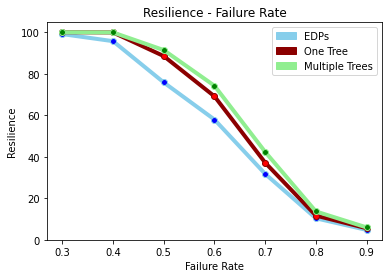

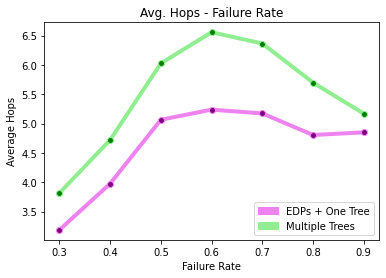

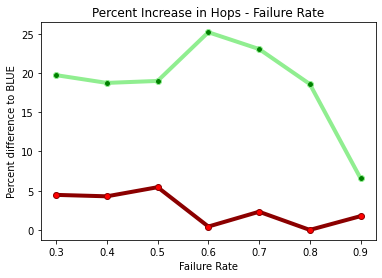

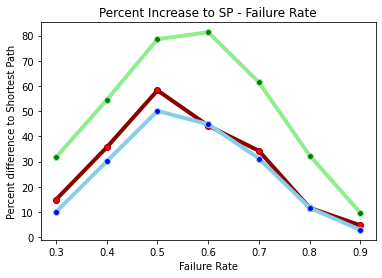

In [37]:
path_base = 'CSVs/n25-clustered/'
pStr = "0.15"
nStr = "25"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,168,0.15,2,NaN,clustered,0.3;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount
1,999,50,192,0.15,5,NaN,clustered,0.3;-0.3,4,5,3,1,12,7,4,3,3,0,4,edgeCount
2,998,50,175,0.15,9,NaN,clustered,0.3;-0.3,2,2,2,0,8,4,2,3,4,1,4,edgeCount
3,997,50,202,0.15,8,NaN,clustered,0.3;-0.3,3,3,2,1,0,2,0,3,2,1,0,edgeCount
4,996,50,194,0.15,7,NaN,clustered,0.3;-0.3,8,5,2,6,6,2,0,11,2,9,2,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,180,0.15,8,NaN,clustered,0.4;-0.3,3,7,2,1,4,2,0,2,2,0,2,edgeCount
1,999,50,171,0.15,4,NaN,clustered,0.4;-0.3,3,5,3,0,34,3,0,3,3,0,10,edgeCount
2,998,50,186,0.15,8,NaN,clustered,0.4;-0.3,15,5,2,13,50,2,0,3,2,1,14,edgeCount
3,997,50,215,0.15,7,NaN,clustered,0.4;-0.3,3,5,2,1,0,2,0,2,2,0,0,edgeCount
4,996,50,180,0.15,7,NaN,clustered,0.4;-0.3,7,5,2,5,36,4,2,7,4,5,12,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,182,0.15,8,NaN,clustered,0.5;-0.3,6,8,3,3,0,14,11,14,14,11,0,edgeCount
1,999,50,200,0.15,3,NaN,clustered,0.5;-0.3,2,2,2,0,18,2,0,6,2,4,6,edgeCount
2,998,50,174,0.15,7,NaN,clustered,0.5;-0.3,3,8,3,0,0,5,2,5,5,2,0,edgeCount
3,997,50,163,0.15,7,NaN,clustered,0.5;-0.3,7,6,3,4,0,5,2,3,5,0,0,edgeCount
4,996,50,191,0.15,5,NaN,clustered,0.5;-0.3,3,2,2,1,0,2,0,3,2,1,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,185,0.15,4,NaN,clustered,0.6;-0.3,8,4,3,5,30,3,0,3,3,0,8,edgeCount
1,999,50,165,0.15,4,NaN,clustered,0.6;-0.3,9,17,4,5,0,10,6,10,10,6,0,edgeCount
2,998,50,188,0.15,8,NaN,clustered,0.6;-0.3,3,3,3,0,26,5,2,3,5,0,6,edgeCount
3,997,50,197,0.15,5,NaN,clustered,0.6;-0.3,31,33,3,28,60,-1,-4,-1,-1,-4,16,edgeCount
4,996,50,172,0.15,4,NaN,clustered,0.6;-0.3,-1,-1,-1,0,6,-1,0,-1,-1,0,2,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,164,0.15,4,NaN,clustered,0.7;-0.3,14,4,4,10,6,10,6,10,10,6,2,edgeCount
1,999,50,166,0.15,5,NaN,clustered,0.7;-0.3,23,3,3,20,0,3,0,3,3,0,0,edgeCount
2,998,50,205,0.15,5,NaN,clustered,0.7;-0.3,39,37,3,36,0,7,4,5,7,2,0,edgeCount
3,997,50,184,0.15,5,NaN,clustered,0.7;-0.3,16,6,4,12,24,-1,-5,-1,-1,-5,6,edgeCount
4,996,50,185,0.15,5,NaN,clustered,0.7;-0.3,22,16,4,18,32,-1,-5,-1,-1,-5,8,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,165,0.15,4,NaN,clustered,0.8;-0.3,-1,-1,-1,0,20,-1,0,-1,-1,0,8,edgeCount
1,999,50,218,0.15,8,NaN,clustered,0.8;-0.3,-1,-1,-1,0,30,-1,0,-1,-1,0,8,edgeCount
2,998,50,191,0.15,7,NaN,clustered,0.8;-0.3,-1,-1,-1,0,6,-1,0,-1,-1,0,2,edgeCount
3,997,50,173,0.15,5,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
4,996,50,171,0.15,4,NaN,clustered,0.8;-0.3,-1,-1,-1,0,14,-1,0,-1,-1,0,4,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,179,0.15,3,NaN,clustered,0.9;-0.3,-1,-1,-1,0,24,-1,0,-1,-1,0,8,edgeCount
1,999,50,205,0.15,10,NaN,clustered,0.9;-0.3,-1,-1,-1,0,8,-1,0,-1,-1,0,2,edgeCount
2,998,50,171,0.15,6,NaN,clustered,0.9;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
3,997,50,183,0.15,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,28,-1,0,-1,-1,0,14,edgeCount
4,996,50,167,0.15,5,NaN,clustered,0.9;-0.3,-1,-1,5,-6,6,-1,-6,-1,-1,-6,2,edgeCount


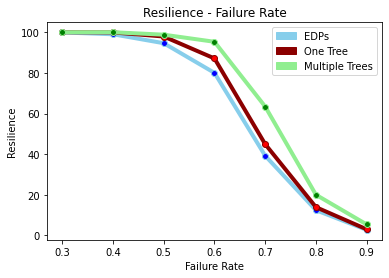

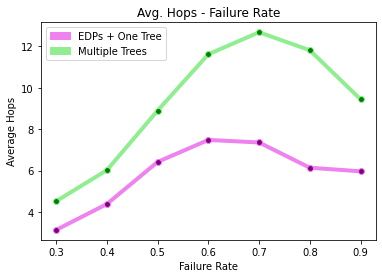

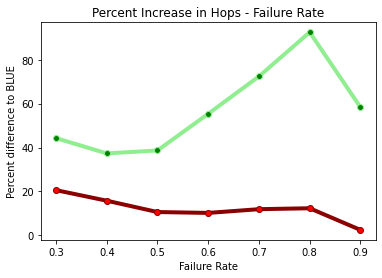

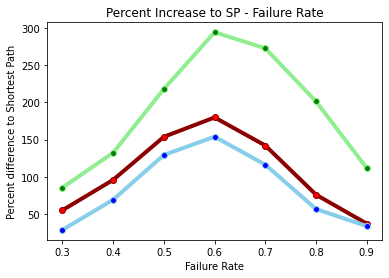

In [38]:
path_base = 'CSVs/n50-clustered/'
pStr = "0.15"
nStr = "50"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,107,0.02,1,NaN,clustered,0.3;-0.3,6,6,6,0,2,6,0,6,6,0,2,edgeCount
1,999,100,101,0.02,2,NaN,clustered,0.3;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount
2,998,100,87,0.02,1,NaN,clustered,0.3;-0.3,10,10,10,0,6,10,0,10,10,0,6,edgeCount
3,997,100,102,0.02,2,NaN,clustered,0.3;-0.3,7,8,3,4,0,3,0,3,3,0,0,edgeCount
4,996,100,98,0.02,1,NaN,clustered,0.3;-0.3,5,5,5,0,0,5,0,5,5,0,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,101,0.02,2,NaN,clustered,0.4;-0.3,11,11,7,4,0,7,0,7,7,0,0,edgeCount
1,999,100,114,0.02,1,NaN,clustered,0.4;-0.3,6,11,6,0,2,6,0,6,11,0,2,edgeCount
2,998,100,118,0.02,2,NaN,clustered,0.4;-0.3,6,5,5,1,0,5,0,5,5,0,0,edgeCount
3,997,100,98,0.02,2,NaN,clustered,0.4;-0.3,8,8,8,0,2,8,0,8,8,0,2,edgeCount
4,996,100,102,0.02,2,NaN,clustered,0.4;-0.3,7,6,6,1,0,6,0,6,6,0,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,100,0.02,1,NaN,clustered,0.5;-0.3,9,9,9,0,0,9,0,9,9,0,0,edgeCount
1,999,100,97,0.02,2,NaN,clustered,0.5;-0.3,10,10,10,0,0,10,0,10,10,0,0,edgeCount
2,998,100,90,0.02,1,NaN,clustered,0.5;-0.3,7,7,7,0,0,7,0,7,7,0,0,edgeCount
3,997,100,88,0.02,1,NaN,clustered,0.5;-0.3,9,9,9,0,0,9,0,9,9,0,0,edgeCount
4,996,100,104,0.02,2,NaN,clustered,0.5;-0.3,9,8,7,2,0,11,4,11,11,4,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,107,0.02,1,NaN,clustered,0.6;-0.3,9,9,9,0,0,9,0,9,9,0,0,edgeCount
1,999,100,107,0.02,2,NaN,clustered,0.6;-0.3,7,29,7,0,2,17,10,17,31,10,2,edgeCount
2,998,100,110,0.02,2,NaN,clustered,0.6;-0.3,2,2,2,0,0,2,0,2,2,0,0,edgeCount
3,997,100,90,0.02,1,NaN,clustered,0.6;-0.3,22,18,12,10,4,-1,-13,22,18,10,4,edgeCount
4,996,100,96,0.02,1,NaN,clustered,0.6;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,109,0.02,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
1,999,100,94,0.02,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount
2,998,100,98,0.02,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount
3,997,100,85,0.02,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
4,996,100,73,0.02,1,NaN,clustered,0.7;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,117,0.02,1,NaN,clustered,0.8;-0.3,-1,-1,-1,0,4,-1,0,-1,-1,0,4,edgeCount
1,999,100,110,0.02,3,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
2,998,100,98,0.02,1,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
3,997,100,94,0.02,1,NaN,clustered,0.8;-0.3,5,5,5,0,0,5,0,5,5,0,0,edgeCount
4,996,100,113,0.02,2,NaN,clustered,0.8;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,97,0.02,1,NaN,clustered,0.9;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount
1,999,100,92,0.02,3,NaN,clustered,0.9;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount
2,998,100,107,0.02,1,NaN,clustered,0.9;-0.3,-1,-1,-1,0,2,-1,0,-1,-1,0,2,edgeCount
3,997,100,101,0.02,1,NaN,clustered,0.9;-0.3,-1,-1,-1,0,4,-1,0,-1,-1,0,4,edgeCount
4,996,100,107,0.02,2,NaN,clustered,0.9;-0.3,-1,-1,-1,0,0,-1,0,-1,-1,0,0,edgeCount


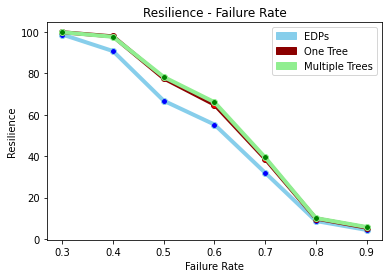

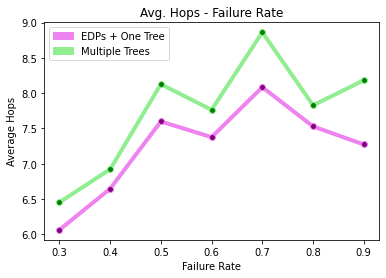

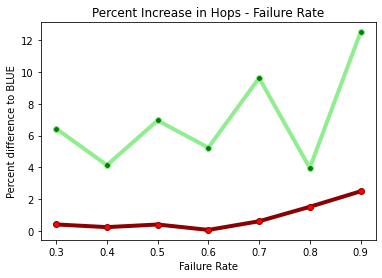

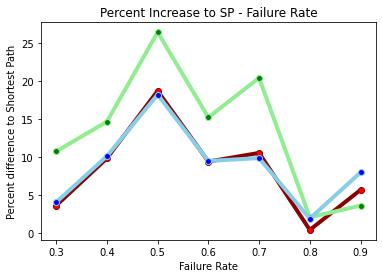

In [39]:
path_base = 'CSVs/n100-clustered/'
pStr = "0.02"
nStr = "100"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

max res diff mult: 24.199999999999996
max res diff one: 12.700000000000003
mean increase: 1.607557314254627


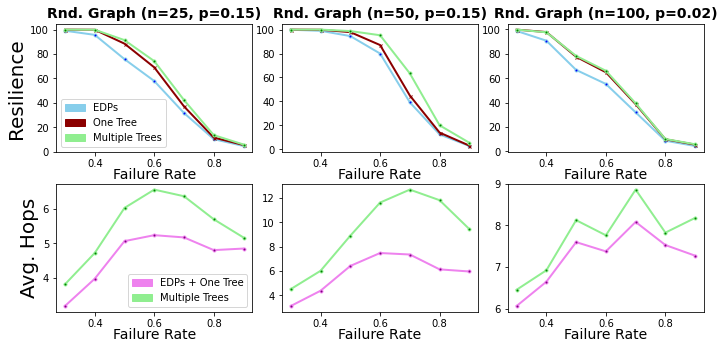

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(10,5))

#fig.suptitle('Experiment Results for Clustered Failures (1000 runs)', fontsize=16)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.25)
fontsize1 = 14
fontsize2 = 20
fontsize3 = 14

ax1[0].set_title('Rnd. Graph (n=25, p=0.15)', fontsize=fontsize1, fontweight='bold')
ax1[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax1[0].set_ylabel('Resilience', fontsize=fontsize2)

ax1[1].set_title('Rnd. Graph (n=50, p=0.15)', fontsize=fontsize1, fontweight='bold')
ax1[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[1].set_ylabel('Resilience')

ax1[2].set_title('Rnd. Graph (n=100, p=0.02)', fontsize=fontsize1, fontweight='bold')
ax1[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[2].set_ylabel('Resilience')


#ax2[0].set_title('Random Graph (n=25, p=0.15)')
ax2[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax2[0].set_ylabel('Avg. Hops', fontsize=fontsize2)

#ax2[1].set_title('Random Graph (n=50, p=0.15)')
ax2[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[1].set_ylabel('Avg. Hops Needed')

#ax2[2].set_title('Random Graph (n=100, p=0.02)')
ax2[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[2].set_ylabel('Avg. Hops Needed')

#------------------------------------------------------------------------------------

path_base = 'CSVs/n25-clustered/'
pStr = "0.15"
nStr = "25"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]

rPaths = [None] * len(files)
rOne = [None] * len(files)
rMult = [None] * len(files)

avgHopsPaths = [None] * len(files)
avgHopsOne = [None] * len(files)
avgHopsMult = [None] * len(files)
avgHopsSP = [None] * len(files)

for i in range(len(files)):
    
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plotEvalAx2(xVals, (ax1, ax2, 0), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, markersize=3, alpha=1) 

n25resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n25resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n25hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))


#------------------------------------------------------------------------------------


path_base = 'CSVs/n50-clustered/'
pStr = "0.15"
nStr = "50"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]


for i in range(len(files)):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 1), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, markersize=3, alpha=1) 

n50resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n50resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n50hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------



path_base = 'CSVs/n100-clustered/'
pStr = "0.02"
nStr = "100"
files = ['trees-p' + pStr + '-n' + nStr + '-f0.3.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.4.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.5.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.6.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.7.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.8.csv', 
         'trees-p' + pStr + '-n' + nStr + '-f0.9.csv', 
        ]


for i in range(len(files)):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 2), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, markersize=3, alpha=1) 

n100resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n100resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n100hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))


print("max res diff mult:", np.max([n25resDiffMult, n50resDiffMult, n100resDiffMult]))
print("max res diff one:", np.max([n25resDiffOne, n50resDiffOne, n100resDiffOne]))
print("mean increase:", np.mean([n25hopIncrease, n50hopIncrease, n100hopIncrease]))

fig.savefig('subplots_random_clustered_.png', bbox_inches="tight")
fig.savefig('subplots_random_clustered_.svg', bbox_inches="tight")

max res diff mult: 21.5
max res diff one: 5.0
mean increase: 1.5096204346495572


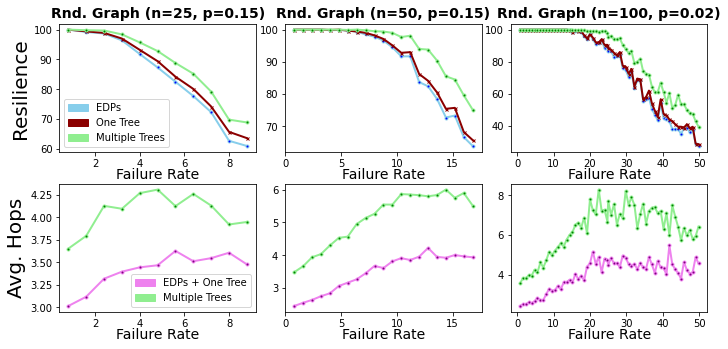

In [38]:
#RANDOM FIX
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(10,5))

#fig.suptitle('Experiment Results for Clustered Failures (1000 runs)', fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.25)

fontsize1 = 14
fontsize2 = 20
fontsize3 = 14

ax1[0].set_title('Rnd. Graph (n=25, p=0.15)', fontsize=fontsize1, fontweight='bold')
ax1[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax1[0].set_ylabel('Resilience', fontsize=fontsize2)

ax1[1].set_title('Rnd. Graph (n=50, p=0.15)', fontsize=fontsize1, fontweight='bold')
ax1[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[1].set_ylabel('Resilience')

ax1[2].set_title('Rnd. Graph (n=100, p=0.02)', fontsize=fontsize1, fontweight='bold')
ax1[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[2].set_ylabel('Resilience')


#ax2[0].set_title('Random Graph (n=25, p=0.15)')
ax2[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax2[0].set_ylabel('Avg. Hops', fontsize=fontsize2)

#ax2[1].set_title('Random Graph (n=50, p=0.15)')
ax2[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[1].set_ylabel('Avg. Hops Needed')

#ax2[2].set_title('Random Graph (n=100, p=0.02)')
ax2[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[2].set_ylabel('Avg. Hops Needed')

#------------------------------------------------------------------------------------

path_base = 'CSVs/n25-random/'

xVals = []
x = 0.8
while(x <= 8.8):
    xVals.append(x)
    x += 0.8
    x = round(x, 1)

files = ['trees-p0.15-n25-ff'+str(val)+'.csv' for val in xVals]

nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles
for i in range(nrFiles):
    
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 0), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

n25resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n25resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n25hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))
#------------------------------------------------------------------------------------


path_base = 'CSVs/n50-random/'

xVals = []
x = 0.8
while(x <= 16.8):
    xVals.append(x)
    x += 0.8
    x = round(x, 1)

files = ['trees-p0.15-n50-ff'+str(val)+'.csv' for val in xVals]

nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles
for i in range(nrFiles):
    
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 1), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

n50resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n50resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n50hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------


path_base = 'CSVs/n100-random/'

xVals = []
x = 0.8
while(x <= 50.0):
    xVals.append(x)
    if x == 24.8:
        x+=0.2
    else:
        x += 0.8
    x = round(x, 1)

files = ['trees-p0.1-n100-ff'+str(val)+'.csv' for val in xVals]


nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)

    
plotEvalAx2(xVals, (ax1, ax2, 2), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

n100resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
n100resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
n100hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))


print("max res diff mult:", np.max([n25resDiffMult, n50resDiffMult, n100resDiffMult]))
print("max res diff one:", np.max([n25resDiffOne, n50resDiffOne, n100resDiffOne]))
print("mean increase:", np.mean([n25hopIncrease, n50hopIncrease, n100hopIncrease]))


fig.savefig('subplots_random_random_.png', bbox_inches="tight")
fig.savefig('subplots_random_random_.svg', bbox_inches="tight")

In [ ]:
#do relative drop-off!